### Data Analytics: Advanced Methods  



### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records.


In [ ]:
Forest_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
Forest=pd.DataFrame(Forest_data)
str(Forest)

'     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area\n0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00\n1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00\n2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00\n3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00\n4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00\n..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...\n512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44\n513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29\n514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16\n515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00\n516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00\n\n[517 rows x 13 columns]'


How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain?

In [ ]:
# 517 Observations with 13 columns in the dataset.
print("Total observations in the Forest dataset:")
print(Forest.shape)
significant_fire= Forest[(Forest['area'] > 0) & (Forest['rain'])]
print("These are the observations with Significant fire(burned are>0) and rain:")
print(significant_fire.shape)

Total observations in the Forest dataset:
(517, 13)
These are the observations with Significant fire(burned are>0) and rain:
(2, 13)



Show the columns month, day, area of all the observations with a significant fire (burned area >0 ).

In [ ]:
Date_with_SigFire= Forest[Forest['area']> 0][['month', 'day', 'area']]


How large are the five largest fires (i.e. having largest area)?

In [ ]:

Forest['area'].sort_values(ascending=False).head(5)

,area
238,1090.84
415,746.28
479,278.53
237,212.88
236,200.94



For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area?

In [ ]:

Forest.sort_values('area', ascending=False).head(5)[['month', 'temp', 'RH', 'wind', 'rain', 'area']]

,month,temp,RH,wind,rain,area
238,sep,25.1,27,4.0,0.0,1090.84
415,aug,27.5,27,4.9,0.0,746.28
479,jul,22.6,57,4.9,0.0,278.53
237,sep,18.8,40,2.2,0.0,212.88
236,sep,18.2,46,1.8,0.0,200.94



For the whole dataset, reorder factor levels of month to be from Jan to Dec.

In [ ]:
from pickle import TRUE
print(Forest['month'].unique())
Forest['month']= Forest['month'].str.capitalize()
#print(Forest['month'].unique())
Forest['month']=Forest['month'].replace({'Sep': 'Sept'})
#print(Forest['month'].unique())
month_reorder=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
Forest['month']=pd.Categorical(Forest['month'], categories=month_reorder, ordered=True)

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']



Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0)

In [ ]:
# INSERT YOUR ANSWER HERE
Forest['Fire_Occ']= np.where(Forest['area'] > 0, True, False)
Forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Fire_Occ
0,7,5,Mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,False
1,7,4,Oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,False
2,7,4,Oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,False
3,8,6,Mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,False
4,8,6,Mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,False



What is the mean area/wind/temp/RH per month?

In [ ]:
# INSERT YOUR ANSWER HERE
mean_val= Forest[['wind', 'area', 'temp', 'RH']].groupby(Forest['month'], observed=False).mean()
print(mean_val)

           wind       area       temp         RH
month                                           
Jan    2.000000   0.000000   5.250000  89.000000
Feb    3.755000   6.275000   9.635000  55.700000
Mar    4.968519   4.356667  13.083333  40.000000
Apr    4.666667   8.891111  12.044444  46.888889
May    4.450000  19.240000  14.650000  67.000000
Jun    4.135294   5.841176  20.494118  45.117647
Jul    3.734375  14.369687  22.109375  45.125000
Aug    4.086413  12.489076  21.631522  45.489130
Sept   3.557558  17.942616  19.612209  42.843023
Oct    3.460000   6.638000  17.093333  37.466667
Nov    4.500000   0.000000  11.800000  31.000000
Dec    7.644444  13.330000   4.522222  38.444444



How many observations are there in each month? Visualize by using a barplot in descending order.

month
Aug     184
Sept    172
Mar      54
Jul      32
Feb      20
Jun      17
Oct      15
Apr       9
Dec       9
Jan       2
May       2
Nov       1
Name: count, dtype: int64


<Axes: title={'center': 'Observation Count by Month'}, xlabel='month'>

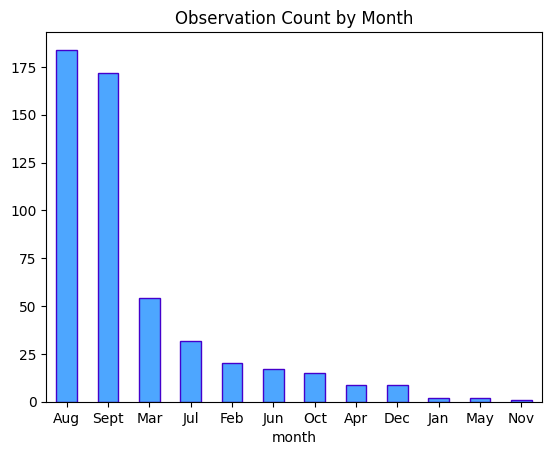

In [ ]:
# INSERT YOUR ANSWER HERE
AX=Forest.value_counts('month')
print(AX)
AX.plot.bar(rot=0, color='#4DA6FF', edgecolor= '#4400CC', title= 'Observation Count by Month')



How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order.

month
Aug     99
Sept    97
Mar     19
Jul     18
Feb     10
Dec      9
Jun      8
Oct      5
Apr      4
May      1
Jan      0
Nov      0
Name: count, dtype: int64


<Axes: title={'center': 'Fire Count By Month'}, xlabel='month'>

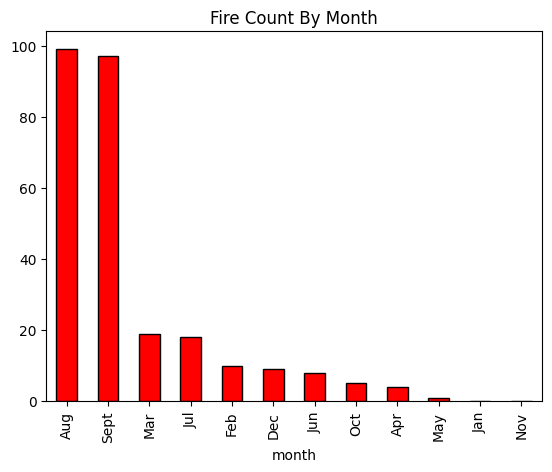

In [ ]:
Fire_C = Forest[Forest['Fire_Occ'] == True]['month'].value_counts().sort_values(ascending=False)
print(Fire_C)
Fire_C.plot.bar(color= 'Red', edgecolor= 'Black', title="Fire Count By Month")



 Instructions:
1. State your question clearly.
2. Explain why you chose this question and how it could provide useful insights about forest fires.
3. Perform the necessary data analysis or visualization to answer your question.
4. Provide a brief interpretation of your findings.

Question:
1. I would like to analyze whether there is a relationship between the area burned by wildfires and two key environmental factors: wind and rainfall.
Also comparing the effect of humidity on wildfire.

2. I chose this question because wind speed and rainfall are two critical environmental factors that can influence the behavior of wildfires. Analyzing the relationship between these variables and the area burned can provide valuable insights into how wind may accelerate the spread of fire, while rainfall could help suppress it. Understanding these patterns can support more effective wildfire prediction, prevention, and response strategies.

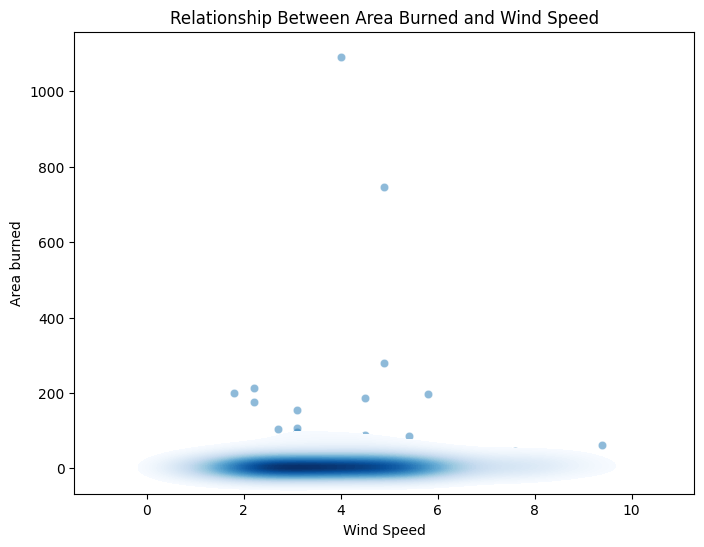

In [ ]:
import seaborn as cbn
fire_wind_factor=Forest[['area', 'wind']]
plt.figure(figsize=(8,6))
cbn.scatterplot(x='wind', y='area', data=fire_wind_factor, alpha=0.5)
cbn.kdeplot(data= Forest, x='wind', y='area', fill=True, cmap='Blues', levels=100)
plt.xlabel('Wind Speed')
plt.ylabel('Area burned')
plt.title('Relationship Between Area Burned and Wind Speed')
plt.show()




There appears to be a mild upward trend in the scatter plot, indicating that higher wind speeds may be associated with larger wildfire areas. Nonetheless, most wildfire occurrences are clustered around average wind speeds, suggesting that wind contributes to fire spread but may not be a strong predictor on its own.

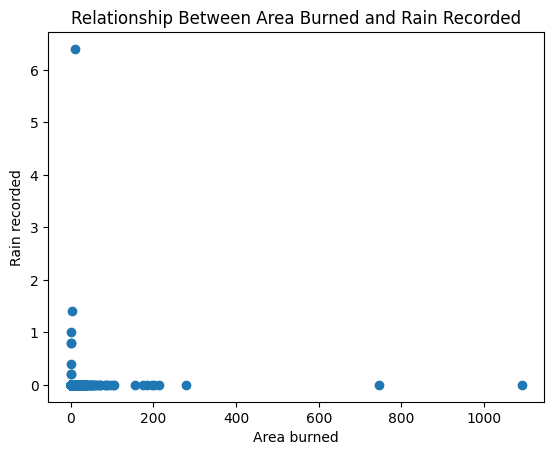

In [ ]:
fire_rain_factor= Forest[['area','rain']]
plt.scatter(fire_rain_factor.area, fire_rain_factor.rain)
plt.xlabel('Area burned')
plt.ylabel('Rain recorded')
plt.title('Relationship Between Area Burned and Rain Recorded')
plt.show()

Analysis of the scatter plot indicates that wildfire activity is highest when no rainfall is recorded. As rainfall increases, both the frequency and extent of burned areas decrease markedly. Notably, less wildfires are recorded on days with measurable rainfall, and most area burned by wildfire is recored on the no rainfall day, suggesting that precipitation plays a critical role in suppressing wildfire outbreaks

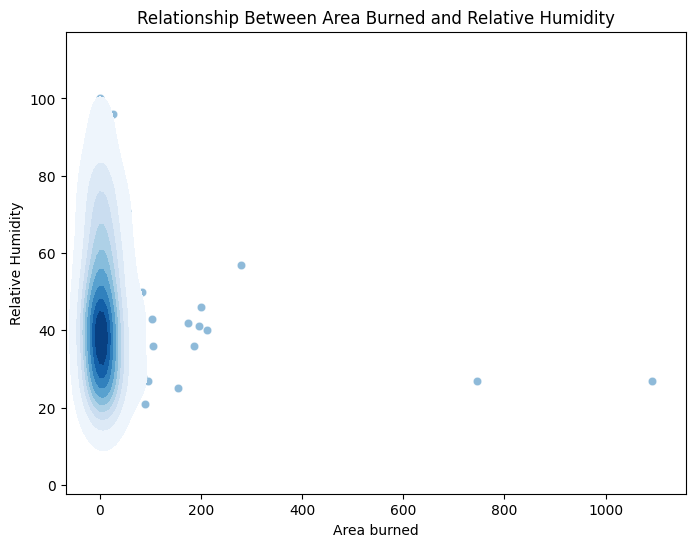

In [ ]:
fire_rh_factor= Forest[['area','RH']]

plt.figure(figsize=(8,6))
cbn.scatterplot(x='area', y='RH', data=fire_rh_factor, alpha=0.5)
cbn.kdeplot(data= Forest, x='area', y='RH', fill=True, cmap='Blues', levels=10)
plt.xlabel('Area burned')
plt.ylabel('Relative Humidity')
plt.title('Relationship Between Area Burned and Relative Humidity')
plt.show()

From the scatter plot, it is evident that wildfires are more concentrated in areas with lower relative humidity. This indicates a potential inverse relationship between relative humidity and wildfire occurrence or severity, highlighting the importance of moisture levels in fire risk assessment